# Titanic – Initial EDA

This notebook loads the local Kaggle Titanic dataset and performs a quick initial exploration.

## Factor (Variable) Explanations

- **PassengerId** — Unique identifier for each passenger. Not used as a predictor.
- **Survived** — **Target variable.** 0 = No, 1 = Yes.
- **Pclass** — Ticket class: 1 = 1st (upper), 2 = 2nd (middle), 3 = 3rd (lower). Proxy for socio-economic status.
- **Name** — Passenger name. Can be used to extract title (Mr, Mrs, Miss, etc.) or family.
- **Sex** — Biological sex (male / female). Strong predictor of survival (“women and children first”).
- **Age** — Age in years. Fractional if under 1. Has missing values.
- **SibSp** — Number of siblings or spouses aboard (Sibling + Spouse). Discrete count (0–8).
- **Parch** — Number of parents or children aboard (Parent + Child). Discrete count (0–6).
- **Ticket** — Ticket number. Often alphanumeric; can be messy for modeling.
- **Fare** — Passenger fare paid. Continuous; may correlate with Pclass and Cabin.
- **Cabin** — Cabin number. Heavily missing; when present, deck/position may be informative.
- **Embarked** — Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.

In [31]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline


In [2]:
base = Path('..') / 'data' / 'raw'
train = pd.read_csv(base / 'train.csv')
test = pd.read_csv(base / 'test.csv')
submission = pd.read_csv(base / 'gender_submission.csv')

train.head(n = 50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print('train shape:', train.shape)
print('test shape:', test.shape)
print('submission shape:', submission.shape)

train.dtypes


train shape: (891, 12)
test shape: (418, 11)
submission shape: (418, 2)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
missing = train.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Cabin       687
Age         177
Embarked      2
dtype: int64

In [5]:
train.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
survival_by_sex = train.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
survival_by_pclass = train.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

display(survival_by_sex)
display(survival_by_pclass)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

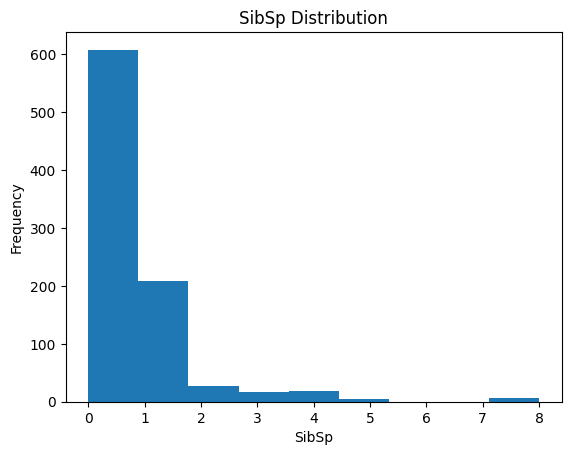

In [7]:
train['SibSp'].plot(kind='hist', bins=9, title='SibSp Distribution')
plt.xlabel('SibSp')
plt.show()

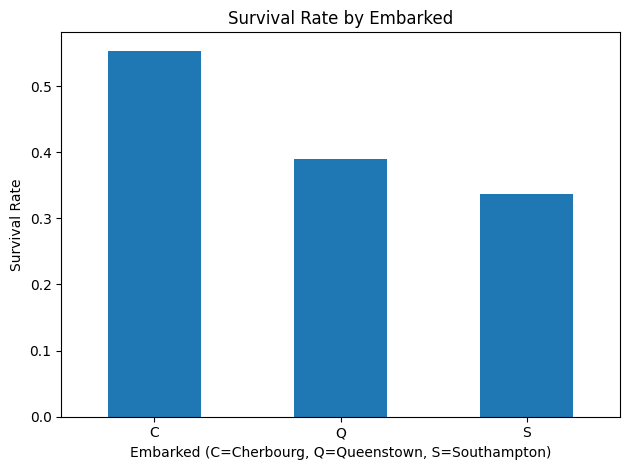

In [8]:
survival_by_embarked = train.groupby('Embarked')['Survived'].mean().sort_values(ascending=False)
survival_by_embarked.plot(kind='bar', title='Survival Rate by Embarked')
plt.ylabel('Survival Rate')
plt.xlabel('Embarked (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

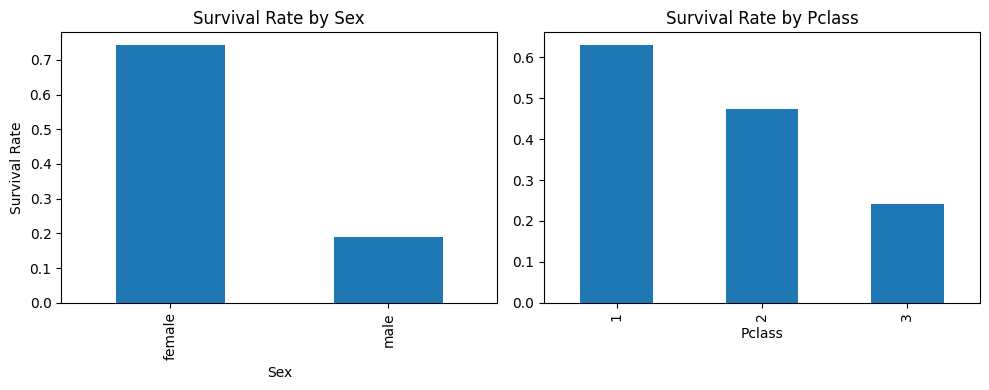

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
survival_by_sex.plot(kind='bar', ax=axes[0], title='Survival Rate by Sex')
survival_by_pclass.plot(kind='bar', ax=axes[1], title='Survival Rate by Pclass')
axes[0].set_ylabel('Survival Rate')
plt.tight_layout()
plt.show()


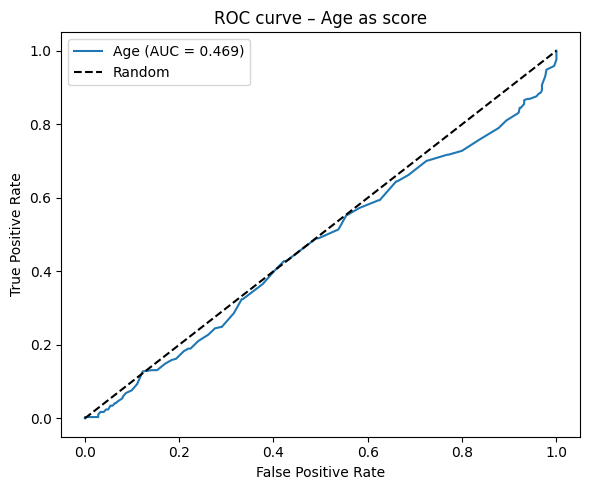

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Drop rows with missing Age for ROC
df_roc = train[['Age', 'Survived']].dropna()
y_true = df_roc['Survived']
y_score = df_roc['Age']  # Age as score (higher age -> different survival; direction doesn't affect ROC shape)

fpr, tpr, _ = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Age (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve – Age as score')
plt.legend()
plt.tight_layout()
plt.show()

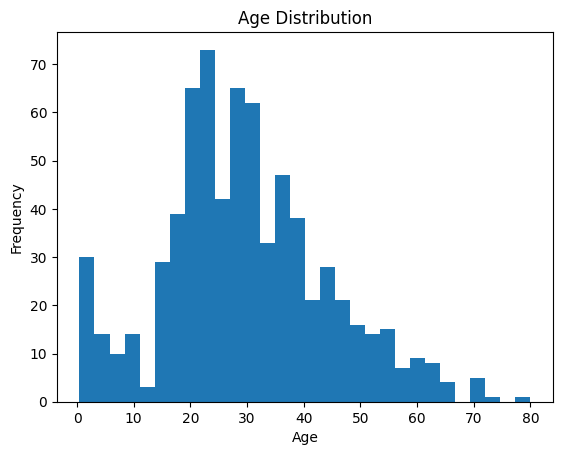

In [11]:
train['Age'].plot(kind='hist', bins=30, title='Age Distribution')
plt.xlabel('Age')
plt.show()


In [12]:
# Производный датасет: выкидываем все строки, где есть хотя бы один пропуск
train_no_missing = train.dropna()
print(f'Исходное число записей: {len(train)}')
print(f'Записей без единого пропуска: {len(train_no_missing)}')
train_no_missing.shape

Исходное число записей: 891
Записей без единого пропуска: 183


(183, 12)

In [13]:
# Список всех тикетов в датасете (train)
tickets = sorted(train['Ticket'].dropna().unique().tolist())
print(tickets)

['110152', '110413', '110465', '110564', '110813', '111240', '111320', '111361', '111369', '111426', '111427', '111428', '112050', '112052', '112053', '112058', '112059', '112277', '112379', '113028', '113043', '113050', '113051', '113055', '113056', '113059', '113501', '113503', '113505', '113509', '113510', '113514', '113572', '113760', '113767', '113773', '113776', '113781', '113783', '113784', '113786', '113787', '113788', '113789', '113792', '113794', '113796', '113798', '113800', '113803', '113804', '113806', '113807', '11668', '11751', '11752', '11753', '11755', '11765', '11767', '11769', '11771', '11774', '11813', '11967', '12233', '12460', '12749', '13049', '13213', '13214', '13502', '13507', '13509', '13567', '13568', '14311', '14312', '14313', '14973', '1601', '16966', '16988', '17421', '17453', '17463', '17464', '17465', '17466', '17474', '17764', '19877', '19928', '19943', '19947', '19950', '19952', '19972', '19988', '19996', '2003', '211536', '21440', '218629', '219533', 

In [36]:
# Разбиваем возраст на группы по 10 лет и считаем среднее таргета (Survived) по группам + 95% ДИ
import numpy as np

df_age = train[['Age', 'Survived']].dropna(subset=['Age'])
df_age['Age_group'] = pd.cut(df_age['Age'], bins=range(0, 91, 10), right=False, labels=[f'{x}-{x+9}' for x in range(0, 90, 10)])

# ДИ для доли: нормальная аппроксимация p ± z * sqrt(p*(1-p)/n), z=1.96 для 95%
z = 1.96
agg = df_age.groupby('Age_group', observed=True)['Survived'].agg(['mean', 'count'])
agg['se'] = np.sqrt(agg['mean'] * (1 - agg['mean']) / agg['count'])
agg['ci_low'] = (agg['mean'] - z * agg['se']).clip(0, 1)
agg['ci_high'] = (agg['mean'] + z * agg['se']).clip(0, 1)
agg['pct_ship'] = agg['count'] / len(train) * 100
print('Среднее таргета по возрастным группам (10 лет) и 95% доверительный интервал:')
print(agg[['count', 'pct_ship', 'mean', 'ci_low', 'ci_high']].round(4))
print()

# Среднее и ДИ по всему датасету
n_total = len(train)
p_total = train['Survived'].mean()
se_total = np.sqrt(p_total * (1 - p_total) / n_total)
ci_low_total = max(0, p_total - z * se_total)
ci_high_total = min(1, p_total + z * se_total)
print(f'Среднее таргета по всему датасету: {p_total:.4f}')
print(f'95% ДИ: [{ci_low_total:.4f}, {ci_high_total:.4f}]')

Среднее таргета по возрастным группам (10 лет) и 95% доверительный интервал:
           count  pct_ship    mean  ci_low  ci_high
Age_group                                          
0-9           62    6.9585  0.6129  0.4917   0.7341
10-19        102   11.4478  0.4020  0.3068   0.4971
20-29        220   24.6914  0.3500  0.2870   0.4130
30-39        167   18.7430  0.4371  0.3619   0.5124
40-49         89    9.9888  0.3820  0.2811   0.4830
50-59         48    5.3872  0.4167  0.2772   0.5561
60-69         19    2.1324  0.3158  0.1068   0.5248
70-79          6    0.6734  0.0000  0.0000   0.0000
80-89          1    0.1122  1.0000  1.0000   1.0000

Среднее таргета по всему датасету: 0.3838
95% ДИ: [0.3519, 0.4158]


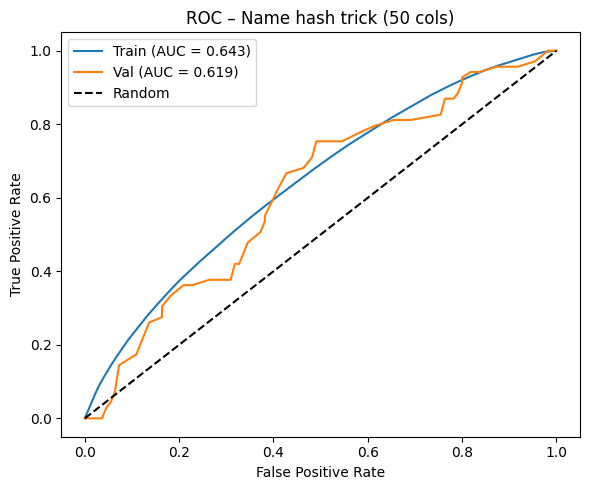

ROC AUC (train): 0.6426
ROC AUC (val):   0.6191


In [16]:
# Shuffle, hash trick on Name, train/val split, CatBoost, ROC
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

RANDOM_STATE = 42
N_HASH = 50

# 1) Shuffle train
train_shuffled = train.sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

# 2) Hash trick on Name -> 50 columns
def hash_bucket(s, n_buckets):
    if pd.isna(s):
        s = ""
    h = int(hashlib.md5(str(s).encode()).hexdigest(), 16)
    return h % n_buckets

hash_cols = [f"name_hash_{i}" for i in range(N_HASH)]
for i in range(N_HASH):
    train_shuffled[hash_cols[i]] = 0
for idx in train_shuffled.index:
    b = hash_bucket(train_shuffled.loc[idx, "Name"], N_HASH)
    train_shuffled.loc[idx, hash_cols[b]] = 1

X_ht = train_shuffled[hash_cols]
y = train_shuffled["Survived"]

# 3) Split 80% train / 20% val
X_tr, X_val, y_tr, y_val = train_test_split(X_ht, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# 4) Train CatBoost on hash-trick columns
cb = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
cb.fit(X_tr, y_tr)

# 5) ROC and ROC AUC on train and val (hash-trick columns)
y_tr_proba = cb.predict_proba(X_tr)[:, 1]
y_val_proba = cb.predict_proba(X_val)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_tr = roc_auc_score(y_tr, y_tr_proba)
auc_val = roc_auc_score(y_val, y_val_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_tr, tpr_tr, label=f"Train (AUC = {auc_tr:.3f})")
plt.plot(fpr_val, tpr_val, label=f"Val (AUC = {auc_val:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – Name hash trick (50 cols)")
plt.legend()
plt.tight_layout()
plt.show()
print(f"ROC AUC (train): {auc_tr:.4f}")
print(f"ROC AUC (val):   {auc_val:.4f}")

In [34]:
# Title from Name -> name class (Mr, Miss, Master, Other) -> survival rate
import re

# Extract title from Name (e.g. "Braund, Mr. Owen Harris" -> "Mr")
train["Title"] = train["Name"].str.extract(r",\s*([^.]+\.)", expand=False).str.strip().str.rstrip(".")

# Map to name classes: Mr, Miss, Master, Other
def to_name_class(title):
    if pd.isna(title):
        return "Other"
    t = title.strip().lower()
    if t == "mr":
        return "Mr"
    if t in ("miss", "ms", "mlle"):
        return "Miss"
    if t == "master":
        return "Master"
    return "Other"

train["NameClass"] = train["Title"].map(to_name_class)

# Survival rate and size by name class
survival_by_name_class = train.groupby("NameClass", observed=True)["Survived"].agg(["mean", "count"])
survival_by_name_class.columns = ["survival_rate", "size"]
print("Survival rate and size by name class:")
print(survival_by_name_class)

Survival rate and size by name class:
           survival_rate  size
NameClass                     
Master          0.575000    40
Miss            0.702703   185
Mr              0.156673   517
Other           0.724832   149


In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
train["Survived"].mean()

np.float64(0.3838383838383838)

In [17]:
a = train["Survived"].to_list()

In [19]:
len(a)

891

In [23]:
s = 0
for x in a:
    s = s + x

In [22]:
s

342

In [24]:
342 / 891


0.3838383838383838

In [25]:
train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [26]:
train["Pclass"].value_counts().sum()

np.int64(891)

In [27]:
train[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
names = train["Name"].to_list()

In [22]:
name_before_comma = [x.split(",")[0] for x in names]
name_before_comma[:10]

['Braund',
 'Cumings',
 'Heikkinen',
 'Futrelle',
 'Allen',
 'Moran',
 'McCarthy',
 'Palsson',
 'Johnson',
 'Nasser']

In [29]:
name_title = [x.split(",")[1].split(" ")[1] for x in names if len(x.split(",")) > 1 and len(x.split(",")[1].split(" ")) > 1]

In [30]:
name_title[:10]

['Mr.',
 'Mrs.',
 'Miss.',
 'Mrs.',
 'Mr.',
 'Mr.',
 'Mr.',
 'Master.',
 'Mrs.',
 'Mrs.']

In [32]:
Counter(name_title)

Counter({'Mr.': 517,
         'Miss.': 182,
         'Mrs.': 125,
         'Master.': 40,
         'Dr.': 7,
         'Rev.': 6,
         'Major.': 2,
         'Mlle.': 2,
         'Col.': 2,
         'Don.': 1,
         'Mme.': 1,
         'Ms.': 1,
         'Lady.': 1,
         'Sir.': 1,
         'Capt.': 1,
         'the': 1,
         'Jonkheer.': 1})

In [35]:
# Table: rows = NameClass, columns = Pclass, values = count of passengers
nameclass_pclass_table = pd.crosstab(train["NameClass"], train["Pclass"])
nameclass_pclass_table

Pclass,1,2,3
NameClass,,,
Master,3,9,28
Miss,48,35,102
Mr,107,91,319
Other,58,49,42


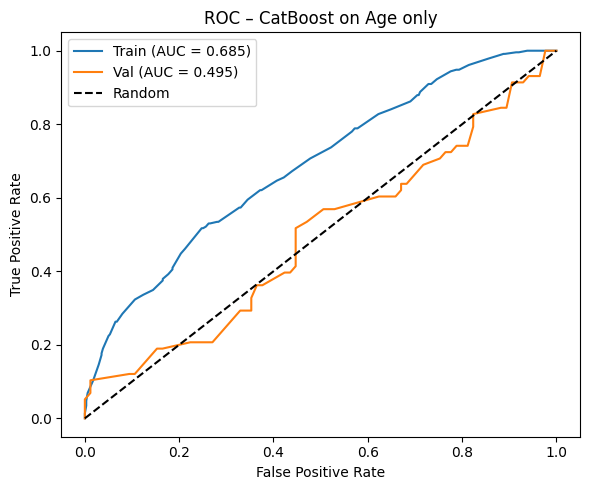

ROC AUC (train): 0.6854
ROC AUC (val):   0.4946


In [37]:
# CatBoost on Age only, train/val split, ROC train + val
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

RANDOM_STATE = 42

# Drop rows with missing Age
df_age_cb = train[["Age", "Survived"]].dropna()
X = df_age_cb[["Age"]]
y = df_age_cb["Survived"]

# Random train/val split 80-20
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Train CatBoost on Age only
cb_age = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
cb_age.fit(X_tr, y_tr)

# Predictions and ROC for train and val
y_tr_proba = cb_age.predict_proba(X_tr)[:, 1]
y_val_proba = cb_age.predict_proba(X_val)[:, 1]
fpr_tr, tpr_tr, _ = roc_curve(y_tr, y_tr_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
auc_tr = roc_auc_score(y_tr, y_tr_proba)
auc_val = roc_auc_score(y_val, y_val_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr_tr, tpr_tr, label=f"Train (AUC = {auc_tr:.3f})")
plt.plot(fpr_val, tpr_val, label=f"Val (AUC = {auc_val:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC – CatBoost on Age only")
plt.legend()
plt.tight_layout()
plt.show()
print(f"ROC AUC (train): {auc_tr:.4f}")
print(f"ROC AUC (val):   {auc_val:.4f}")

### Young (age &lt; 10) and Old (age &gt; 60) as factors

Check whether binary factors **young** and **old** are informative for survival: survival rates by group and AUC of a model using only these two features.

In [38]:
# Check hypothesis: young (age < 10) and old (age > 60) are informative for survival
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

df = train[["Age", "Survived"]].dropna().copy()
df["young"] = (df["Age"] < 10).astype(int)
df["old"] = (df["Age"] > 60).astype(int)

# 1) Survival rate by young and by old (with counts)
print("Survival rate by young (age < 10):")
print(df.groupby("young")["Survived"].agg(["mean", "count"]))
print()
print("Survival rate by old (age > 60):")
print(df.groupby("old")["Survived"].agg(["mean", "count"]))
print()

# 2) Predictive power: train CatBoost on young + old only, report AUC on val
X = df[["young", "old"]]
y = df["Survived"]
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
cb = CatBoostClassifier(random_state=42, verbose=0)
cb.fit(X_tr, y_tr)
auc_val = roc_auc_score(y_val, cb.predict_proba(X_val)[:, 1])
print(f"AUC on val (model with young + old only): {auc_val:.4f}")
print("(AUC > 0.5 suggests the factors are informative for survival.)")

Survival rate by young (age < 10):
           mean  count
young                 
0      0.386503    652
1      0.612903     62

Survival rate by old (age > 60):
         mean  count
old                 
0    0.411850    692
1    0.227273     22

AUC on val (model with young + old only): 0.5219
(AUC > 0.5 suggests the factors are informative for survival.)
